In [1]:
from datetime import datetime

import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt

from my_speedtest import db

In [2]:
with db.get_db() as connection:
    results = db.get_all_results(connection)

In [3]:
df = pd.DataFrame.from_records(results)

In [4]:
df['timestamp'] = df['timestamp'].apply(lambda dt: datetime.fromisoformat(dt))

In [5]:
df['download_rate'] = df['download_rate'].apply(lambda dr: dr / 1_000_000)

In [8]:
df = df[df['timestamp'] >= datetime(2020,8,23,6,0,0)]

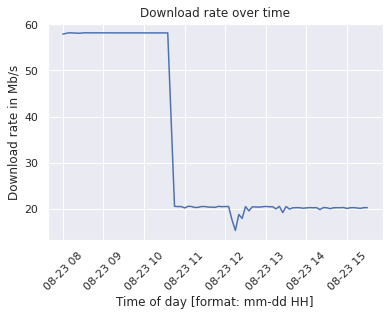

In [14]:
plot = sns.lineplot(x='timestamp', y='download_rate', data=df)

plt.title("Download rate over time")
plt.ylabel("Download rate in Mb/s")
plt.xlabel("Time of day [format: mm-dd HH]")
plt.xticks(rotation=45)

plot.get_figure().savefig("download_rate.png")